# CSE422 - Project Report
---
---
## Title: *The analysis of a disease Cerebral Stroke and its classification*
**Lab Section:** 15  
**Group Number:** 09  
**Date:** *07/01/2025*  
**Authors:**  
- **MD. MOSTAFIJUR RAHMAN**  
  *(ID: 22101721)*
- **MD TOUHIDUR RAHMAN**  
  *(ID: 22101446)*
  

In [114]:
# data manipulation and visualization(6)
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

# Machine learning models(5)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier

# Libraries for evaluation and model selection
from sklearn.metrics import *
from sklearn.model_selection import *

# Library for handling imbalanced datasets
from imblearn.over_sampling import SMOTE



In [115]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
df = pd.read_csv('/content/drive/MyDrive/CSE422_Project_Dataset/dataset.csv')

In [117]:
print(df.shape)

(43400, 12)


In [118]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [120]:
df.count()

,0
id,43400
gender,43400
age,43400
hypertension,43400
heart_disease,43400
ever_married,43400
work_type,43400
Residence_type,43400
avg_glucose_level,43400
bmi,41938


In [121]:
# null values in the dataset
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


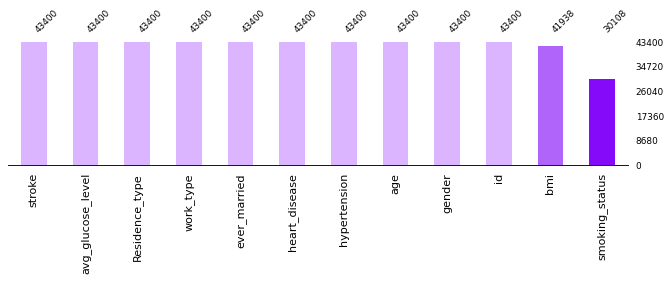

In [122]:
# color=#611f70
# color=#611f70
#f0bbfc
#27092e
#6982b3
color_majority= '#dbb5ff'

color = [color_majority, color_majority, color_majority, color_majority, color_majority, color_majority, color_majority, color_majority, color_majority, color_majority,'#b164fa','#850afa']
fig, axis  = plt.subplots(figsize=(10, 2), dpi=80)
fig.patch.set_facecolor('#ffffff')#fig bg
axis.set_facecolor('#ffffff')# axis bg
#check bar plot missing valu in dataframe(here use missingno as msno)
msno.bar(df, sort='descending',
         color=color,
         ax=axis, fontsize=8,
         labels='off',
         filter='top')
#label-x axis
axis.set_xticklabels(axis.get_xticklabels(),
                     rotation=90, ha='center',
                     size=10, weight='normal',
                     alpha=1)# get_xticklabels current lable
                     #alpa opcaity labe
axis.set_yticklabels('')# y label not necss
axis.spines['bottom'].set_visible(True)
plt.show()




# **Catagorical Features**

       gender ever_married     work_type Residence_type   smoking_status
0        Male           No      children          Rural              NaN
1        Male          Yes       Private          Urban     never smoked
2      Female           No       Private          Urban              NaN
3      Female          Yes       Private          Rural  formerly smoked
4        Male           No  Never_worked          Rural              NaN
...       ...          ...           ...            ...              ...
43395  Female           No      children          Urban     never smoked
43396  Female          Yes      Govt_job          Urban  formerly smoked
43397  Female          Yes       Private          Urban  formerly smoked
43398    Male          Yes       Private          Urban     never smoked
43399  Female          Yes       Private          Urban     never smoked

[43400 rows x 5 columns]


<ipython-input-123-40847ff43848>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


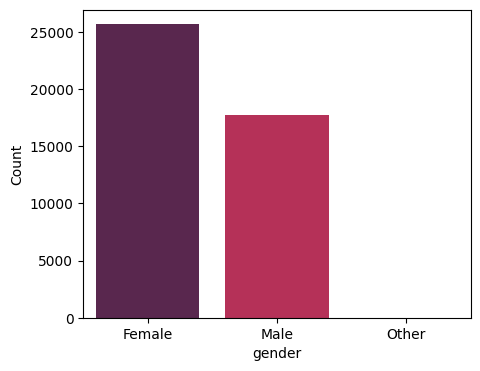

<ipython-input-123-40847ff43848>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


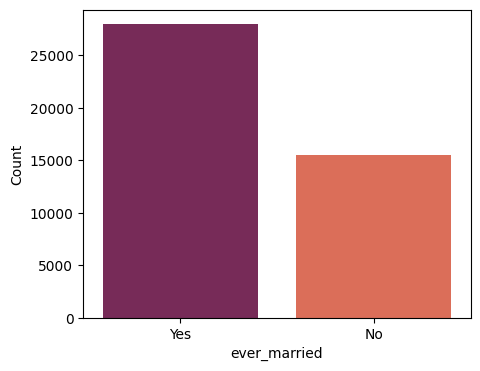

<ipython-input-123-40847ff43848>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


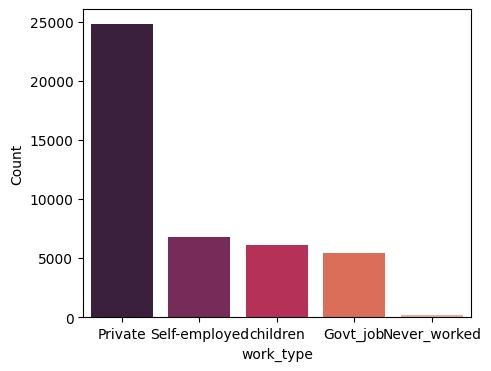

<ipython-input-123-40847ff43848>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


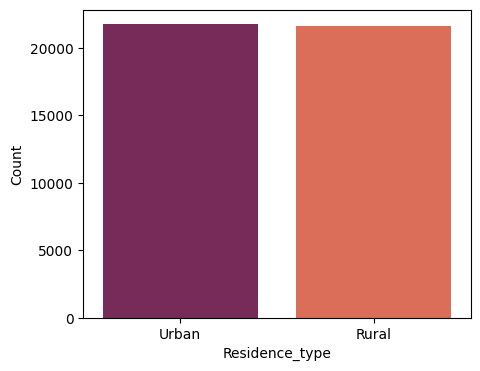

<ipython-input-123-40847ff43848>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-123-40847ff43848>:7: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(


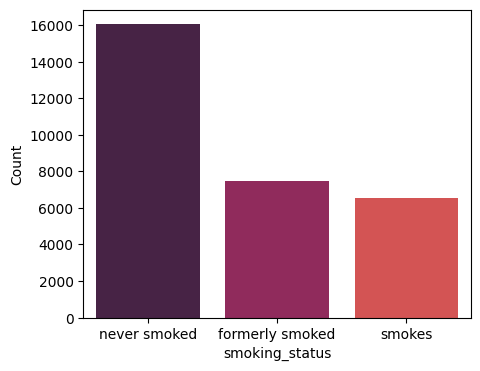

In [123]:
category_cols = df.select_dtypes(include=['object'])
print(category_cols)
for col in category_cols:
    unique_categories = len(df[col].unique())
    color_palette = sns.color_palette("rocket", unique_categories)
    plt.figure(figsize=(5, 4))
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        palette=color_palette
    )

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [124]:
df["work_type"].value_counts()

,count
work_type,
Private,24834
Self-employed,6793
children,6156
Govt_job,5440
Never_worked,177


In [125]:
df["gender"].value_counts()

,count
gender,
Female,25665
Male,17724
Other,11


In [126]:
df["gender"]=df["gender"].map({"Male":1,"Female":0})# Convert categorical data to numerical data

In [127]:
df.count()

,0
id,43400
gender,43389
age,43400
hypertension,43400
heart_disease,43400
ever_married,43400
work_type,43400
Residence_type,43400
avg_glucose_level,43400
bmi,41938


In [128]:
df["gender"].mean()

0.40849063126598906

In [129]:
df["gender"]=df["gender"].fillna(df["gender"].mean())# Fill missing values with the mean of the column

In [130]:
df.count()

,0
id,43400
gender,43400
age,43400
hypertension,43400
heart_disease,43400
ever_married,43400
work_type,43400
Residence_type,43400
avg_glucose_level,43400
bmi,41938


In [131]:
df["ever_married"]=df["ever_married"].map({"Yes":1,"No":0})

In [132]:
df.count()

,0
id,43400
gender,43400
age,43400
hypertension,43400
heart_disease,43400
ever_married,43400
work_type,43400
Residence_type,43400
avg_glucose_level,43400
bmi,41938


In [133]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())

In [134]:
df = pd.get_dummies(df,columns=["work_type"])# One-hot encode 'work_type'

In [135]:
# Map 'Residence_type' and create dummies for 'smoking_status'
df["Residence_type"]=df["Residence_type"].map({"Urban":1,"Rural":0})

In [136]:
df = pd.get_dummies(df,columns=["smoking_status"])

In [137]:
df.count()

,0
id,43400
gender,43400
age,43400
hypertension,43400
heart_disease,43400
ever_married,43400
Residence_type,43400
avg_glucose_level,43400
bmi,43400
stroke,43400


In [138]:
df=df.drop(["id"],axis=1)#drop

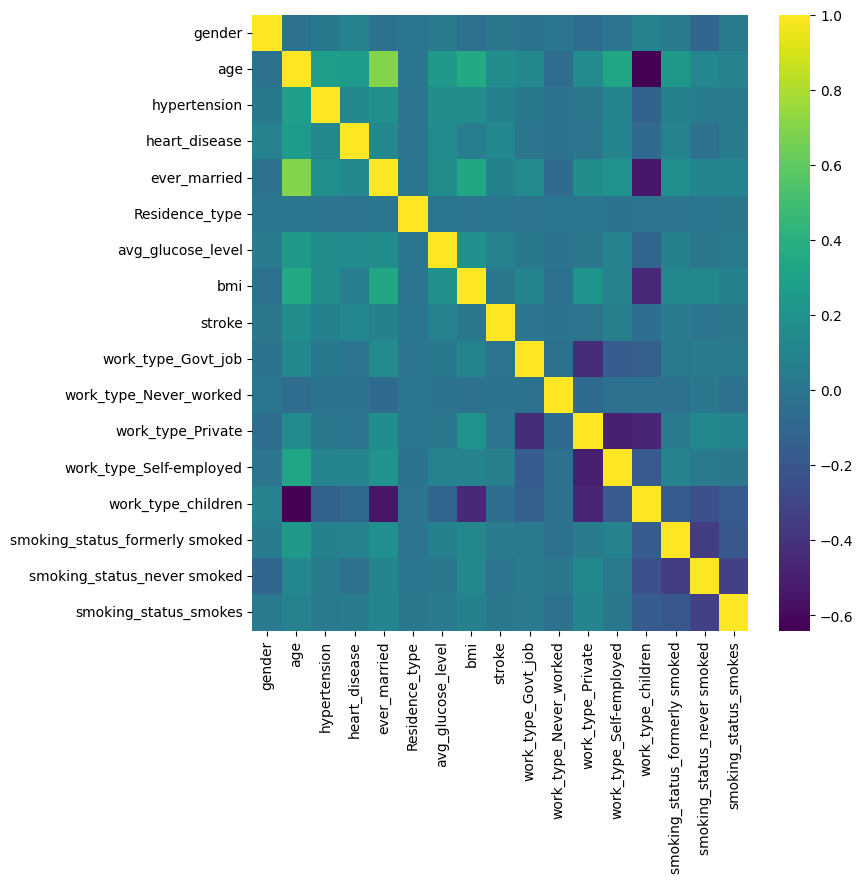

In [139]:
correlation=df.corr()#correlation matrix
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(correlation,cmap='viridis')
plt.show()#heatmap

# Splitting the Features
# Target & Cross validation

In [140]:
y=df["stroke"]# target varriable
# Drop the target variable from the dataset to create the feature set
X=df.drop(["stroke"],axis=1)

# classifiers
model1=LogisticRegression(solver="liblinear")
# Evaluate models using cross-validation
cross_val_score(model1,X,y,cv=10).mean()

0.9819585253456221

In [141]:
model2=DecisionTreeClassifier()
cross_val_score(model2,X,y,cv=10).mean()

0.9605069124423963

In [142]:
model3=RandomForestClassifier()
cross_val_score(model3,X,y,cv=10).mean()

0.9817511520737329

In [143]:
model4=GradientBoostingClassifier()
cross_val_score(model4,X,y,cv=10).mean()

0.9814976958525345

In [144]:
model5=KNeighborsClassifier()
cross_val_score(model5,X,y,cv=10).mean()

0.9815898617511521

In [145]:
model6 = VotingClassifier(estimators = [("lr",model1),("dtf",model2),("rf",model3),("gb",model4),("knn",model5),],voting="soft")
cross_val_score(model6,X,y,cv=10).mean()

0.9819354838709676

In [146]:
y=df["stroke"]
X=df.drop(["stroke"],axis=1)

In [147]:
from sklearn.preprocessing import StandardScaler
# Apply scaling to the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [148]:
# split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

# Imbalanced Classification




In [149]:
#SMOTE for handling class imbalance
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


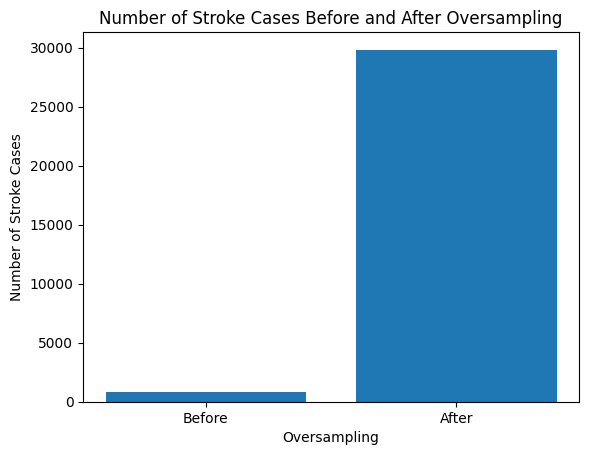

In [150]:
num_stroke_before = y.sum()
num_stroke_after = y_train.sum()
# Visualize the number of stroke cases before and after SMOTE
plt.bar(['Before', 'After'], [num_stroke_before, num_stroke_after])
plt.title('Number of Stroke Cases Before and After Oversampling')
plt.xlabel('Oversampling')
plt.ylabel('Number of Stroke Cases')
plt.show()

# **Logistic regression**

In [151]:
model_1=LogisticRegression(solver='liblinear')
model_1.fit(X_train,y_train)
y_hat=model_1.predict(X_test)

In [152]:
acc_val = accuracy_score(y_test,y_hat)

print('Logistic Regression :',acc_val*100,"%")
print(classification_report(y_test,y_hat))

Logistic Regression : 89.57757296466974 %
              precision    recall  f1-score   support

           0       0.99      0.91      0.94     12791
           1       0.07      0.37      0.11       229

    accuracy                           0.90     13020
   macro avg       0.53      0.64      0.53     13020
weighted avg       0.97      0.90      0.93     13020



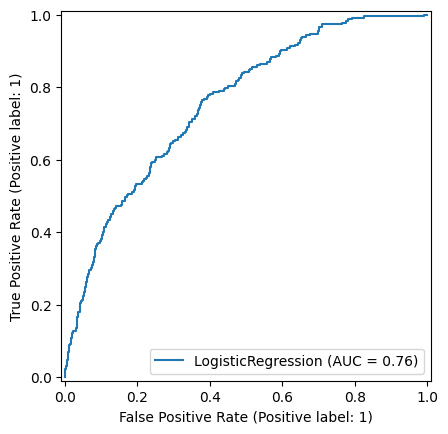

In [153]:
RocCurveDisplay.from_estimator(model_1,X_test,y_test)

# DecisionTree

In [154]:
# DecisionTree
model_5= DecisionTreeClassifier()
model_5.fit(X_train,y_train)
y_hat=model_5.predict(X_test)
# print(X_test)

In [155]:
acc_val = accuracy_score(y_test,y_hat)

print('DecisionTree :',acc_val*100,"%")
print(classification_report(y_test,y_hat))

DecisionTree : 95.70660522273425 %
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     12791
           1       0.05      0.08      0.06       229

    accuracy                           0.96     13020
   macro avg       0.52      0.53      0.52     13020
weighted avg       0.97      0.96      0.96     13020



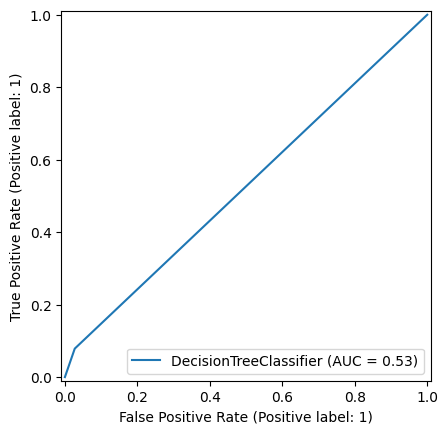

In [156]:
RocCurveDisplay.from_estimator(model_5,X_test,y_test)

# **KnnClassifier**

In [157]:
model_3= KNeighborsClassifier(n_neighbors = 5)
model_3.fit(X_train,y_train)
y_hat=model_3.predict(X_test)

In [158]:
acc_val = accuracy_score(y_test,y_hat)

print('KNN :',acc_val*100,"%")
print(classification_report(y_test,y_hat))

KNN : 86.42857142857143 %
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     12791
           1       0.05      0.36      0.09       229

    accuracy                           0.86     13020
   macro avg       0.52      0.62      0.51     13020
weighted avg       0.97      0.86      0.91     13020



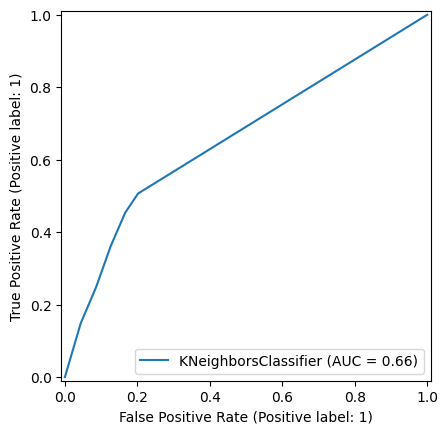

In [159]:
RocCurveDisplay.from_estimator(model_3,X_test,y_test)

# RandomForestClassifier

In [160]:
# RandomForestClassifier
model_4= RandomForestClassifier()
model_4.fit(X_train,y_train)
y_hat=model_4.predict(X_test)

In [161]:
acc_val = accuracy_score(y_test,y_hat)

print('RandomForestClassifier:',acc_val*100,"%")
print(classification_report(y_test,y_hat))

RandomForestClassifier: 97.76497695852534 %
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12791
           1       0.07      0.02      0.03       229

    accuracy                           0.98     13020
   macro avg       0.53      0.51      0.51     13020
weighted avg       0.97      0.98      0.97     13020



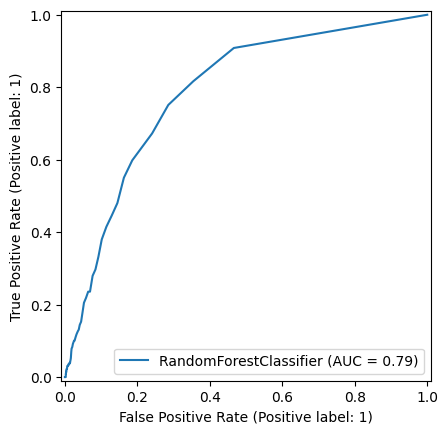

In [162]:
RocCurveDisplay.from_estimator(model_4,X_test,y_test)

# Gradint Boosting

In [163]:
# Gradint Boosting

In [164]:
model_2= GradientBoostingClassifier()
model_2.fit(X_train,y_train)
y_hat=model_2.predict(X_test)

In [165]:
acc_val = accuracy_score(y_test,y_hat)

print('GradientBoosting :',acc_val*100,"%")
print(classification_report(y_test,y_hat))

GradientBoosting : 94.60829493087559 %
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     12791
           1       0.08      0.21      0.12       229

    accuracy                           0.95     13020
   macro avg       0.53      0.58      0.55     13020
weighted avg       0.97      0.95      0.96     13020



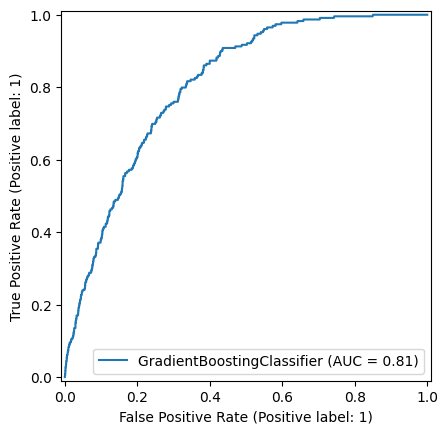

In [166]:
RocCurveDisplay.from_estimator(model_2,X_test,y_test)

# Model Accuracy and Error  

In [167]:
models = {
    "Logistic Regression": 89.68509984639017,
    "K-Nearest Neighbors": 86.52073732718894,
    "Decision Tree": 95.67588325652842,
    "Random Forest": 97.74193548387096,

}

name = list(models.keys())
accu = list(models.values())

error = []
for i in list(models.values()):
  error.append(100-i)
# print(f"Model Name: {name} and \nAccuracy {accu}")
# print(error)
# for i in models:
#     m_name=i
#     m_acc=models[i]
#     print(f"Model Name: {m_name} , Accuracy {m_acc}")


err = [100 - i for i in accu]

for model, accuracy, err in zip(name, accu, error):
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%, Error: {err:.2f}%")



Model: Logistic Regression, Accuracy: 89.69%, Error: 10.31%
Model: K-Nearest Neighbors, Accuracy: 86.52%, Error: 13.48%
Model: Decision Tree, Accuracy: 95.68%, Error: 4.32%
Model: Random Forest, Accuracy: 97.74%, Error: 2.26%


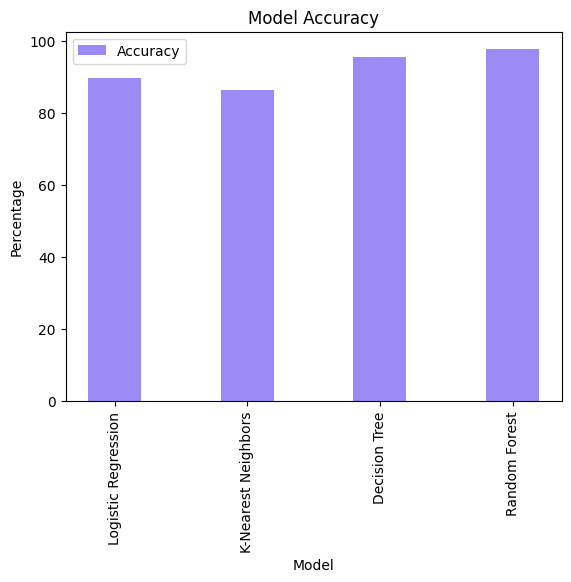

In [168]:
plt.bar(name, accu, label='Accuracy', color='#9b89f5', width = 0.4)
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

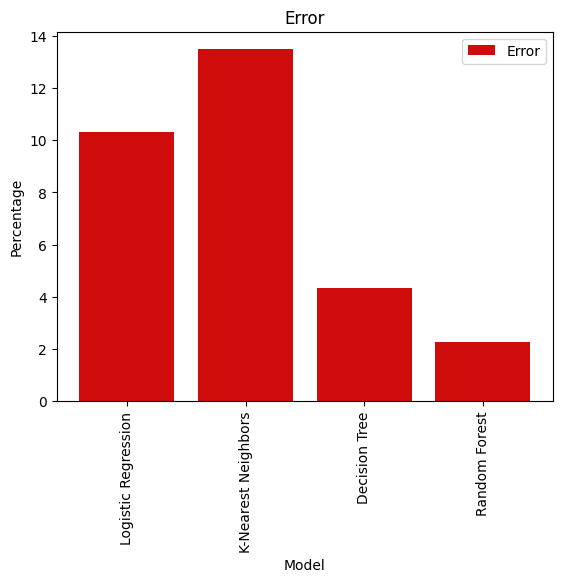

In [169]:
plt.bar(name, error , label='Error', color='#cf0c0c')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Error')
plt.xticks(rotation=90)
plt.legend()
plt.show()